<a href="https://colab.research.google.com/github/SANGUNDE/ML-/blob/main/Online_reatail_data_clustering_with_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
#import the necessary libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [8]:
pd.set_option('display.max_columns', 999)
pd.set_option('display.max_rows', 999)

#%pip install openpyxl

In [9]:
#upload the dataset
df = pd.read_excel('/content/online_retail_II.xlsx')

In [10]:
df.head(5)
#we use the .head() to get an overview of the dataset. intial it is set to first 10 rows and all the columns

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [11]:
df.describe()
#from the dataset, some values are missing in the df['customer ID']
#in the df['quantity'] the min is negative
#some mistakes to work on.

,Quantity,InvoiceDate,Price,Customer ID
count,525461.000000,525461,525461.000000,417534.000000
mean,10.337667,2010-06-28 11:37:36.845017856,4.688834,15360.645478
min,-9600.000000,2009-12-01 07:45:00,-53594.360000,12346.000000
25%,1.000000,2010-03-21 12:20:00,1.250000,13983.000000
50%,3.000000,2010-07-06 09:51:00,2.100000,15311.000000
75%,10.000000,2010-10-15 12:45:00,4.210000,16799.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000
std,107.424110,NaN,146.126914,1680.811316


In [12]:
#get a deeper understanding of our dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [13]:
df.describe(include='object')

,Invoice,StockCode,Description,Country
count,525461,525461,522533,525461
unique,28816,4632,4681,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,675,3516,3549,485852


A very useful skill every data science and ML or DL student should learn is RegEx  (rergular Expression ) It is a very useful skill in Data cleaning or EDA ( Explanatory Data Analysis)

In [14]:
#we use method inorder to check for missing values in our dataset.
df.isnull().sum()

,0
Invoice,0
StockCode,0
Description,2928
Quantity,0
InvoiceDate,0
Price,0
Customer ID,107927
Country,0


from the df['customer ID'] we have we have 107927 null values.

In [15]:
df[df['Customer ID'].isnull()].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01 11:49:00,0.85,NaN,United Kingdom
1055,489548,22271,FELTCRAFT DOLL ROSIE,1,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1056,489548,22254,FELT TOADSTOOL LARGE,12,2009-12-01 12:32:00,1.25,NaN,United Kingdom
1057,489548,22273,FELTCRAFT DOLL MOLLY,3,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1058,489548,22195,LARGE HEART MEASURING SPOONS,1,2009-12-01 12:32:00,1.65,NaN,United Kingdom


In [16]:
# Remove rows where 'Customer ID' is null
df.dropna(subset=['Customer ID'], inplace=True)

In [17]:
df['Customer ID'].isnull().sum()

np.int64(0)

In [18]:
#from the description of the dataset. Invoices with certain letters in them signifies something.
#cast df['invoice'] as a string then search through it using RegEx
import re
df['Invoice'] = df['Invoice'].astype('str')
df[df['Invoice'].str.match("^\\d{6}$") == True].head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [19]:
#repeating the same process so that we can get other features from the df['invoice'] with unique features.
with_letter = df[df['Invoice'].str.contains("[a-zA-Z]") == True]
print(f'there are {len(with_letter)} Invoice entries with  a letter ')


there are 9839 Invoice entries with  a letter 


In [20]:
#we look at characters that contain letters.
df['Invoice'].str.replace('[0-9]','', regex = True).unique()

array(['', 'C'], dtype=object)

In [21]:
#we take a look at invoices that start with the letter A

df[df['Invoice'].str.startswith('A')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [22]:
#A quick inspecting on the stockCode column
df['StockCode'] = df['StockCode'].astype('str')

In [23]:
df[df['StockCode'].str.match("[^\\d{5}$]") == True]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
89,489439,POST,POSTAGE,3,2009-12-01 09:28:00,18.0,12682.0,France
126,489444,POST,POSTAGE,1,2009-12-01 09:55:00,141.0,12636.0,USA
173,489447,POST,POSTAGE,1,2009-12-01 10:10:00,130.0,12362.0,Belgium
625,489526,POST,POSTAGE,6,2009-12-01 11:50:00,18.0,12533.0,Germany
735,C489535,D,Discount,-1,2009-12-01 12:11:00,9.0,15299.0,United Kingdom
...,...,...,...,...,...,...,...,...
522974,538003,POST,POSTAGE,8,2010-12-09 12:05:00,18.0,12429.0,Denmark
523064,538008,POST,POSTAGE,5,2010-12-09 12:17:00,18.0,12683.0,France
524491,538093,POST,POSTAGE,5,2010-12-09 14:49:00,18.0,12682.0,France
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.5,15329.0,United Kingdom


Surprisingly there more than just 5 digits entries in the StockCode. There is need for more analysis. More, there is no information on the stockCode mentioned in the decription of the dataset.

In [24]:
# Select rows where StockCode does not match either pattern
df[~df['StockCode'].str.match("^\\d{5}$", na=False) & ~df['StockCode'].str.match("^\\d{5}[a-zA-Z]+$", na=False)]['StockCode'].unique()

array(['POST', 'D', 'M', 'C2', 'BANK CHARGES', 'TEST001', 'TEST002',
       'PADS', 'ADJUST', 'ADJUST2', 'SP1002'], dtype=object)

In [25]:
#Go through each one of them and closely analyse them using RegEx, Example

df[df['StockCode'].str.match('POST')].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
89,489439,POST,POSTAGE,3,2009-12-01 09:28:00,18.00,12682.0,France
126,489444,POST,POSTAGE,1,2009-12-01 09:55:00,141.00,12636.0,USA
173,489447,POST,POSTAGE,1,2009-12-01 10:10:00,130.00,12362.0,Belgium
625,489526,POST,POSTAGE,6,2009-12-01 11:50:00,18.00,12533.0,Germany
927,C489538,POST,POSTAGE,-1,2009-12-01 12:18:00,9.58,15796.0,United Kingdom


In [26]:
#Majority of them after close anaysis should be removed except POST and PADS


# **DATA** **CLEANING**

In [27]:
cleaned_df = df.copy()

In [28]:
cleaned_df['Invoice'] = cleaned_df['Invoice'].astype('str')

mask = (
    cleaned_df['Invoice'].str.match("^\\d{6}$") == True
)
cleaned_df = cleaned_df[mask]
cleaned_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [29]:
cleaned_df['StockCode'] = cleaned_df['StockCode'].astype('str')
mask = (
    (cleaned_df['StockCode'].str.match("^\\d{5}$") ==True) |
    (cleaned_df['StockCode'].str.match("^\\d{5}[a-zA-Z]+$")==True) |
    (cleaned_df['StockCode'].str.match("^POST") == True) |
    (cleaned_df['StockCode'].str.match("^PADS") == True)
)
cleaned_df = cleaned_df[mask]
display(cleaned_df.head())

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [30]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,407075.000000,407075,407075.000000,407075.000000
mean,13.599843,2010-07-01 10:28:16.580089344,3.035083,15368.758357
min,1.000000,2009-12-01 07:45:00,0.000000,12346.000000
25%,2.000000,2010-03-26 14:01:00,1.250000,13996.000000
50%,5.000000,2010-07-09 15:48:00,1.950000,15321.000000
75%,12.000000,2010-10-14 17:09:00,3.750000,16814.000000
max,19152.000000,2010-12-09 20:01:00,850.000000,18287.000000
std,96.913800,NaN,4.808773,1679.862345


In [31]:
#A quick look at our dataset, shows that we have negatives in the Quantity and the price is zero
cleaned_df[df['Price'] == 0].head()

print('there are {} prices with zero '.format(len(cleaned_df[cleaned_df['Price'] == 0])))


there are 28 prices with zero 


/tmp/ipython-input-1739053521.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cleaned_df[df['Price'] == 0].head()


In [32]:
cleaned_df[df['Price'] == 0].head(20)

/tmp/ipython-input-3473235464.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cleaned_df[df['Price'] == 0].head(20)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
4674,489825,22076,6 RIBBONS EMPIRE,12,2009-12-02 13:34:00,0.0,16126.0,United Kingdom
6781,489998,48185,DOOR MAT FAIRY CAKE,2,2009-12-03 11:19:00,0.0,15658.0,United Kingdom
18738,490961,22065,CHRISTMAS PUDDING TRINKET POT,1,2009-12-08 15:25:00,0.0,14108.0,United Kingdom
18739,490961,22142,CHRISTMAS CRAFT WHITE FAIRY,12,2009-12-08 15:25:00,0.0,14108.0,United Kingdom
32916,492079,85042,ANTIQUE LILY FAIRY LIGHTS,8,2009-12-15 13:49:00,0.0,15070.0,United Kingdom
40101,492760,21143,ANTIQUE GLASS HEART DECORATION,12,2009-12-18 14:22:00,0.0,18071.0,United Kingdom
47126,493761,79320,FLAMINGO LIGHTS,24,2010-01-06 14:54:00,0.0,14258.0,United Kingdom
48342,493899,22355,"CHARLOTTE BAG , SUKI DESIGN",10,2010-01-08 10:43:00,0.0,12417.0,Belgium
57619,494607,21533,RETRO SPOT LARGE MILK JUG,12,2010-01-15 12:43:00,0.0,16858.0,United Kingdom
111348,500073,21662,VINTAGE GLASS COFFEE CADDY,1,2010-03-04 11:44:00,0.0,13047.0,United Kingdom


In [33]:
cleaned_df['Price'].min()

0.0

In [34]:
len(cleaned_df) / len(df)

0.9749505429497957

Dropped 0.13.. of the original dataset

# **FEATURE** **ENGINEERING**

In [35]:
 #calculating the amount spent by a customer on a specific transaction

cleaned_df['Sales Amount'] = cleaned_df['Quantity'] * cleaned_df['Price']

cleaned_df.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Sales Amount
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [42]:
aggregated_df = cleaned_df.groupby(by = 'Customer ID', as_index = False).agg(
    Monetary = ('Sales Amount', 'sum'),
    Frequency = ('Invoice', 'nunique'),
    LastInvoiceDate = ('InvoiceDate', 'max')
)

In [43]:
aggregated_df.head()

,Customer ID,Monetary,Frequency,LastInvoiceDate
0,12346.0,169.36,2,2010-06-28 13:53:00
1,12347.0,1323.32,2,2010-12-07 14:57:00
2,12348.0,222.16,1,2010-09-27 14:59:00
3,12349.0,2671.14,3,2010-10-28 08:23:00
4,12351.0,300.93,1,2010-11-29 15:23:00


In [45]:
#we take a look at the recency, which is the difference of the latest day and the date of purchase
max_invoice_date = cleaned_df['InvoiceDate'].max()

aggregated_df['Recency'] = (max_invoice_date - aggregated_df['LastInvoiceDate']).dt.days

In [46]:
aggregated_df.head(5)

,Customer ID,Monetary,Frequency,LastInvoiceDate,Recency
0,12346.0,169.36,2,2010-06-28 13:53:00,164
1,12347.0,1323.32,2,2010-12-07 14:57:00,2
2,12348.0,222.16,1,2010-09-27 14:59:00,73
3,12349.0,2671.14,3,2010-10-28 08:23:00,42
4,12351.0,300.93,1,2010-11-29 15:23:00,10


# **DATA VISUALISATION**

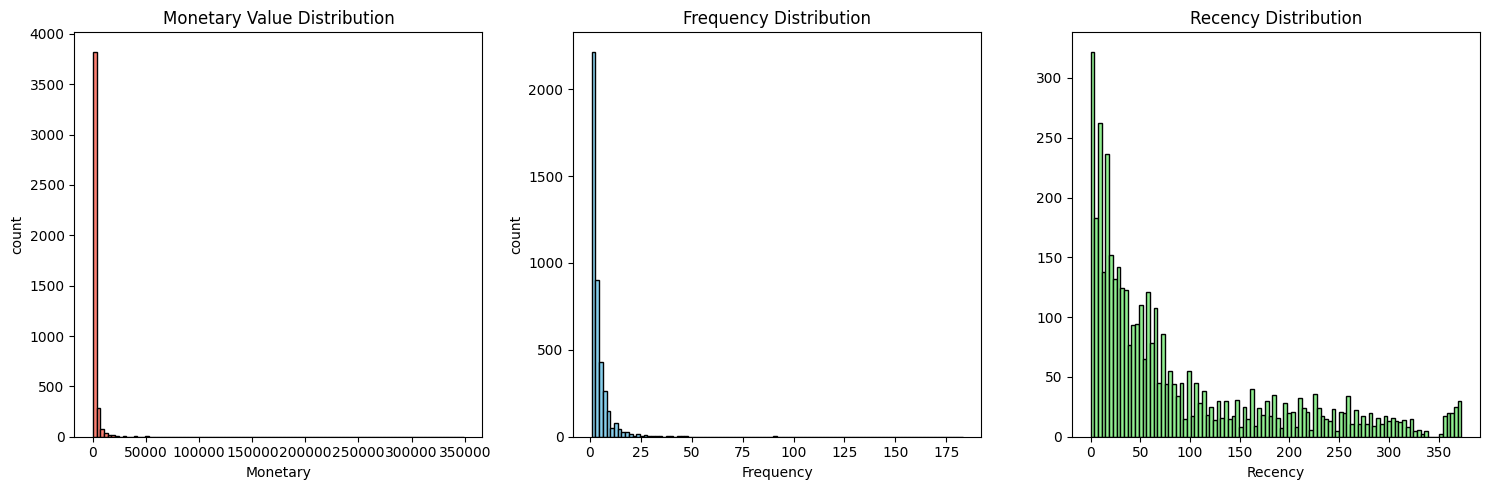

In [50]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(aggregated_df['Monetary'], bins=100, color='salmon', edgecolor = 'black')
plt.title('Monetary Value Distribution')
plt.xlabel('Monetary')
plt.ylabel('count')

plt.subplot(1, 3, 2)
plt.hist(aggregated_df['Frequency'], bins=100, color='skyblue', edgecolor='black')
plt.title('Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('count')

plt.subplot(1, 3, 3)
plt.hist(aggregated_df['Recency'], bins=100, color='lightgreen', edgecolor='black')
plt.title('Recency Distribution')
plt.xlabel('Recency')
plt.ylabel

plt.tight_layout()
plt.show()

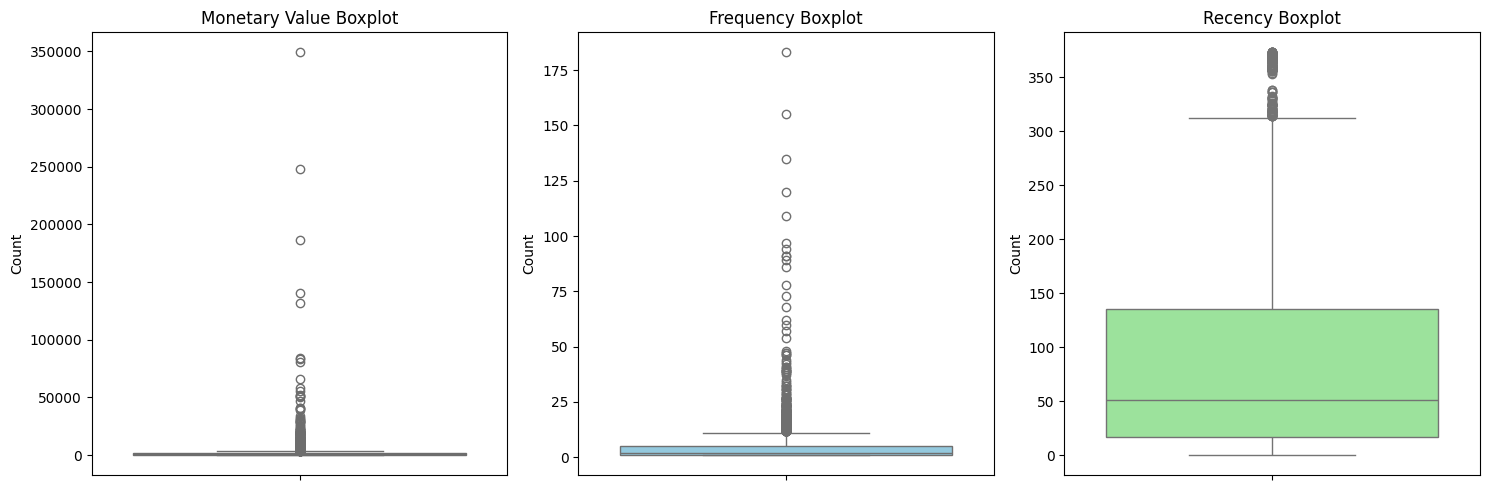

In [51]:
#for a deeper detection of outlier we are going to use boxplots

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=aggregated_df['Monetary'], color='salmon')
plt.title('Monetary Value Boxplot')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
sns.boxplot(data=aggregated_df['Frequency'], color='skyblue')
plt.title('Frequency Boxplot')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
sns.boxplot(data=aggregated_df['Recency'], color='lightgreen')
plt.title('Recency Boxplot')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [52]:
#to avoid removing the outliers in the monetary and frequency set. I am going to employ the following approach.

M_Q1 = aggregated_df['Monetary'].quantile(0.25)
M_Q3 = aggregated_df['Monetary'].quantile(0.75)
M_IQR = M_Q3 - M_Q1

monetary_outliers = aggregated_df[(aggregated_df['Monetary'] < M_Q1 - 1.5 * M_IQR) | (aggregated_df['Monetary'] > M_Q3 + 1.5 * M_IQR)].copy()

In [53]:
monetary_outliers.describe()

,Customer ID,Monetary,Frequency,LastInvoiceDate,Recency
count,420.000000,420.00000,420.000000,420,420.000000
mean,15080.669048,12300.87230,17.285714,2010-11-09 16:32:02.285714432,29.864286
min,12357.000000,3851.01000,1.000000,2009-12-10 18:03:00,0.000000
25%,13596.750000,4615.45500,8.000000,2010-11-08 15:20:00,3.000000
50%,14927.000000,6279.99500,12.000000,2010-11-26 13:17:30,13.000000
75%,16673.500000,10398.63250,18.000000,2010-12-06 11:11:00,31.000000
max,18260.000000,349164.35000,183.000000,2010-12-09 19:32:00,364.000000
std,1729.090619,25927.88599,19.824150,NaN,51.638806


In [54]:
F_Q1 = aggregated_df['Frequency'].quantile(0.25)
F_Q3 = aggregated_df['Frequency'].quantile(0.75)
F_IQR = F_Q3 - F_Q1

frequency_outliers = aggregated_df[(aggregated_df['Frequency'] < F_Q1 - 1.5 * F_IQR) | (aggregated_df['Frequency'] > F_Q3 + 1.5 * F_IQR)].copy()

frequency_outliers.describe()

,Customer ID,Monetary,Frequency,LastInvoiceDate,Recency
count,283.000000,283.000000,283.000000,283,283.000000
mean,15311.639576,14326.010622,23.703180,2010-11-23 09:40:01.272084480,16.148410
min,12422.000000,1094.390000,12.000000,2010-05-12 16:51:00,0.000000
25%,13741.000000,4331.560500,13.000000,2010-11-19 15:09:00,2.000000
50%,15311.000000,6615.770000,17.000000,2010-12-02 08:52:00,7.000000
75%,16798.000000,11680.485000,23.000000,2010-12-07 10:29:30,20.000000
max,18260.000000,349164.350000,183.000000,2010-12-09 19:32:00,211.000000
std,1769.580015,31197.852198,21.900247,NaN,26.430946


In [55]:
non_outliers = aggregated_df[~aggregated_df.index.isin(monetary_outliers.index) & ~aggregated_df.index.isin(frequency_outliers.index)]

In [56]:
non_outliers.describe()

,Customer ID,Monetary,Frequency,LastInvoiceDate,Recency
count,3812.000000,3812.000000,3812.000000,3812,3812.000000
mean,15377.373295,892.807101,2.866737,2010-09-03 08:53:08.452256,97.181794
min,12346.000000,1.550000,1.000000,2009-12-01 09:55:00,0.000000
25%,13912.750000,282.585000,1.000000,2010-07-08 14:42:30,22.000000
50%,15390.500000,591.470000,2.000000,2010-10-12 15:43:30,58.000000
75%,16854.500000,1275.950000,4.000000,2010-11-17 13:28:30,154.000000
max,18287.000000,3817.180000,11.000000,2010-12-09 20:01:00,373.000000
std,1692.953099,826.216197,2.242121,NaN,98.257186


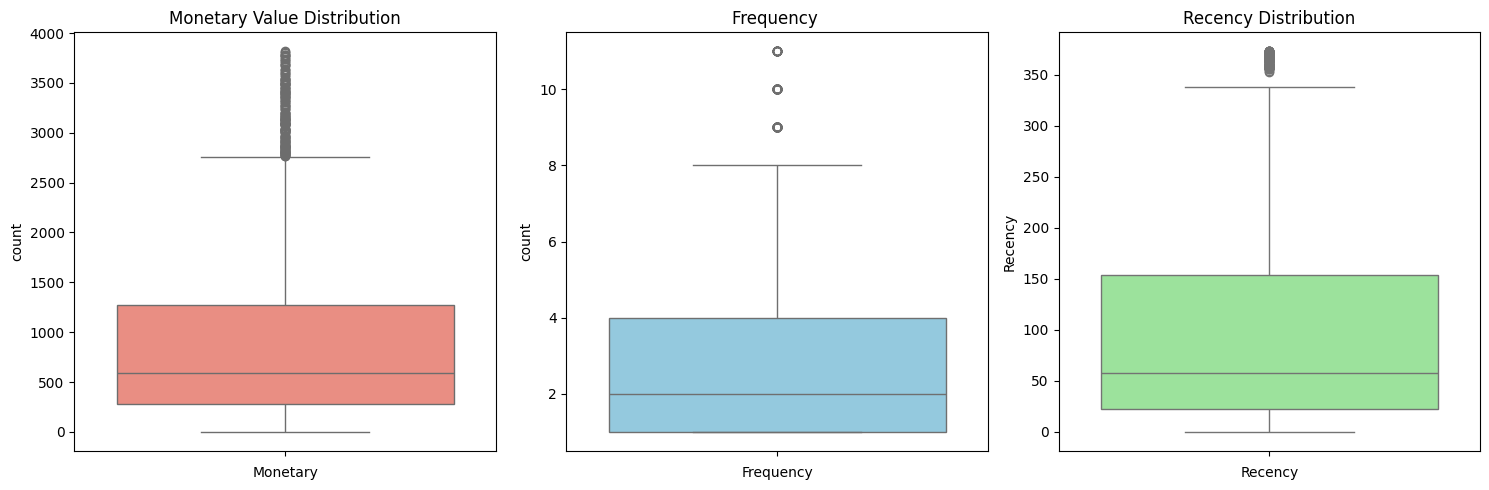

In [61]:

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot( data = non_outliers['Monetary'],  color='salmon')
plt.title('Monetary Value Distribution')
plt.xlabel('Monetary')
plt.ylabel('count')

plt.subplot(1, 3, 2)
sns.boxplot(data = non_outliers['Frequency'],color='skyblue')
plt.title('Frequency ')
plt.xlabel('Frequency')
plt.ylabel('count')

plt.subplot(1, 3, 3)
sns.boxplot(data = non_outliers['Recency'],color='lightgreen')
plt.title('Recency Distribution')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()

Text(0.5, 0.92, '3D Scatter Plot')

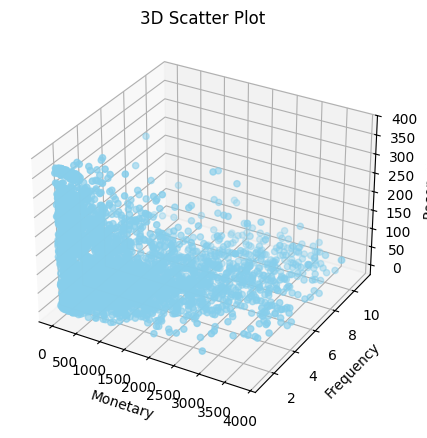

In [72]:
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(projection= '3d')

ax1.scatter(non_outliers['Monetary'], non_outliers['Frequency'], non_outliers['Recency'], color='skyblue')
ax1.set_xlabel('Monetary')
ax1.set_ylabel('Frequency')
ax1.set_zlabel('Recency')
ax1.set_title('3D Scatter Plot')

In [66]:
#scaling our data

scaler = StandardScaler()

scaled_data = scaler.fit_transform(non_outliers[['Monetary', 'Frequency', 'Recency']])

In [67]:
scaled_data

array([[-0.87572964, -0.38662068,  0.68012299],
       [ 0.52113403, -0.38662068, -0.96882767],
       [-0.81181546, -0.83268546, -0.24613942],
       ...,
       [-0.6243823 , -0.83268546,  2.01353371],
       [ 0.42805901, -0.38662068,  0.14065148],
       [ 1.69820799,  0.50550888, -0.81614706]])

In [70]:
scaled_data_df = pd.DataFrame(scaled_data, index = non_outliers.index, columns=['Monetary', 'Frequency', 'Recency'])

In [71]:
scaled_data_df.head()

,Monetary,Frequency,Recency
0,-0.875730,-0.386621,0.680123
1,0.521134,-0.386621,-0.968828
2,-0.811815,-0.832685,-0.246139
3,2.152664,0.059444,-0.561679
4,-0.716465,-0.832685,-0.887398


# **KMeans** **Clustering**

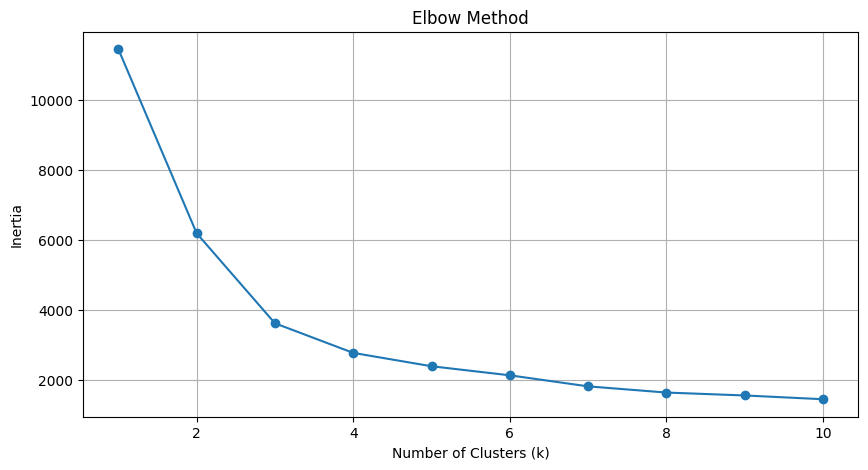

In [73]:
max_k = 10

inertia_values = []
k_values = range(1, max_k + 1)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)
    kmeans.fit_predict(scaled_data_df)

    inertia_values.append(kmeans.inertia_)

#using the elbow method
plt.figure(figsize=(10, 5))
plt.plot(k_values, inertia_values, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid(True)

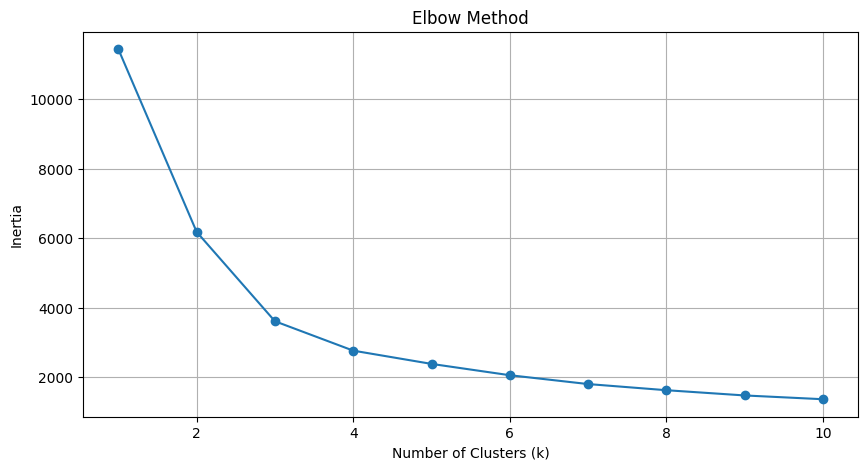

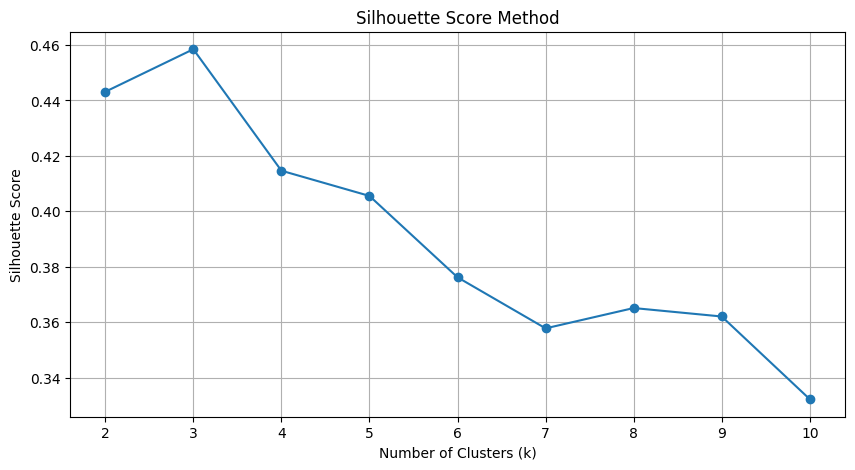

In [75]:
max_k = 10

inertia_values = []
silhouette_scores = []
k_values = range(1, max_k + 1)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000, n_init=10)
    Cluster_label = kmeans.fit_predict(scaled_data_df)

    inertia_values.append(kmeans.inertia_)

    # Calculate silhouette score only for k > 1
    if k > 1:
        sil_score = silhouette_score(scaled_data_df, Cluster_label)
        silhouette_scores.append(sil_score)
    else:
        silhouette_scores.append(None) # Append None for k=1 where silhouette is not defined


#using the elbow method
plt.figure(figsize=(10, 5))
plt.plot(k_values, inertia_values, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid(True)

plt.figure(figsize=(10, 5))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')
plt.grid(True)

In [76]:
kmeans = KMeans(n_clusters=4, random_state=42, max_iter=1000)
Cluster_label = kmeans.fit_predict(scaled_data_df)

Cluster_label

array([3, 0, 2, ..., 3, 0, 0], dtype=int32)

In [77]:
non_outliers['Cluster'] = Cluster_label



/tmp/ipython-input-1390654885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliers['Cluster'] = Cluster_label


In [78]:
non_outliers.head()

,Customer ID,Monetary,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.0,169.36,2,2010-06-28 13:53:00,164,3
1,12347.0,1323.32,2,2010-12-07 14:57:00,2,0
2,12348.0,222.16,1,2010-09-27 14:59:00,73,2
3,12349.0,2671.14,3,2010-10-28 08:23:00,42,0
4,12351.0,300.93,1,2010-11-29 15:23:00,10,2


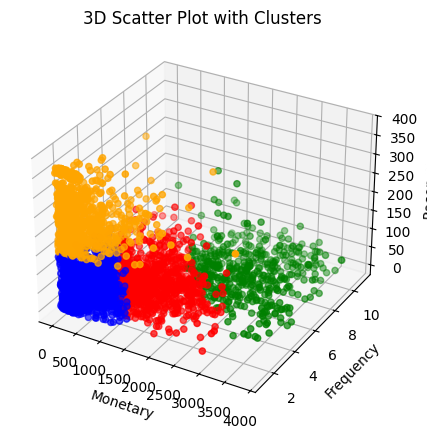

In [85]:
#we use 3-D plot one more time to look at our data points

plt.figure(figsize=(10, 5))
ax = plt.axes(projection='3d')

color_map = {0: 'red', 1:
             'green', 2:
             'blue', 3:
             'orange'}

colors = non_outliers['Cluster'].map(color_map)

scatter = ax.scatter(non_outliers['Monetary'],
           non_outliers['Frequency'],
           non_outliers['Recency'],
           #c=non_outliers['Cluster'],
           c=colors,
          marker='o' )

ax.set_xlabel('Monetary')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot with Clusters')
plt.show()

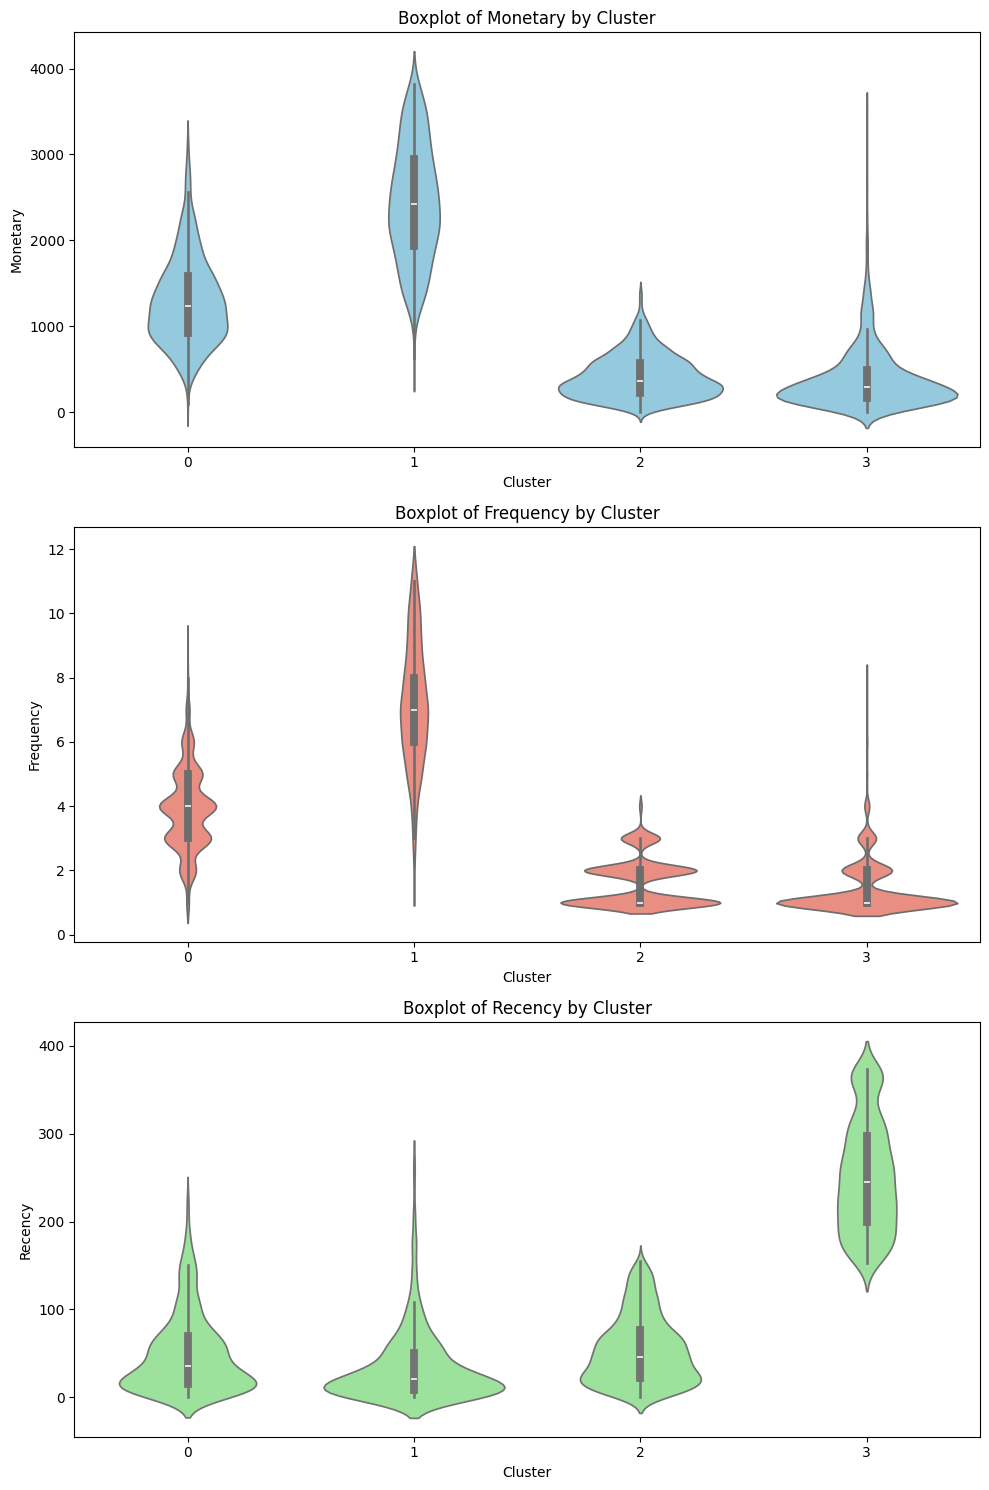

In [92]:
plt.figure(figsize=(10, 15))

plt.subplot(3, 1, 1)
sns.violinplot(x='Cluster', y='Monetary', data=non_outliers, color='skyblue')
plt.title('Boxplot of Monetary by Cluster')
plt.ylabel('Monetary')
plt.xlabel('Cluster')

plt.subplot(3, 1, 2)
sns.violinplot(x='Cluster', y='Frequency', data=non_outliers, color='salmon')
plt.title('Boxplot of Frequency by Cluster')
plt.ylabel('Frequency')

plt.subplot(3, 1, 3)
sns.violinplot(x='Cluster', y='Recency', data=non_outliers, color='lightgreen')
plt.title('Boxplot of Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

It is very unhelpful to have clusters with number for names. Hence, we have to give a name to each and every cluster in our set, according to our observation.